# Machine Learning topological phases in real space: Nearest-neighbours SSH model 6561_70 periodic boundary conditions.

In this notebook we produce the results of the machine learning analysis of topological phase transitions occurring  in nearest-neighbours SSH models as decribed in the paper [Machine learning topological phases in real space](https://arxiv.org/abs/1901.01963).

## Running models with SSH data

In [56]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 328 µs, sys: 11 µs, total: 339 µs
Wall time: 230 µs


In [2]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_70.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_70"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918540 entries, 0 to 918539
Columns: 148 entries, id to feat139
dtypes: float64(143), int32(3), object(2)
memory usage: 1.0+ GB
CPU times: user 13 s, sys: 1.07 s, total: 14.1 s
Wall time: 13.4 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.084515,0.084515,...,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.119523,0.119403,...,0.107686,0.105251,0.111901,0.109905,0.115216,0.113673,0.117602,0.116526,0.119042,0.118441
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.119523,0.119042,...,0.074521,0.065845,0.090009,0.082598,0.102604,0.096696,0.111901,0.107686,0.117602,0.115216
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.084515,0.084515,...,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.002030,-0.007389,...,-0.053680,-0.058417,-0.043892,-0.048835,-0.033750,-0.038860,-0.023336,-0.028571,-0.012734,-0.018053


#### Checking initialization

In [3]:
%%time
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  140
n_hamiltonians:  6561
n_ts:  2
CPU times: user 668 µs, sys: 56 µs, total: 724 µs
Wall time: 597 µs


In [4]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.8306660570035056
% val:  0.0
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  5450
number of val hamiltonians:  0
number of test hamiltonians:  1111
total number of hamiltonians:  6561


train ids:  [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,

## Running a simulation

In [5]:
%%time
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, random_features = random_features, \
                          store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [30:38<00:00, 17.97s/it]

CPU times: user 33min 45s, sys: 37.5 s, total: 34min 23s
Wall time: 30min 38s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.084515,0.084515,...,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.119523,0.119403,...,0.107686,0.105251,0.111901,0.109905,0.115216,0.113673,0.117602,0.116526,0.119042,0.118441
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.119523,0.119042,...,0.074521,0.065845,0.090009,0.082598,0.102604,0.096696,0.111901,0.107686,0.117602,0.115216
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.084515,0.084515,...,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.002030,-0.007389,...,-0.053680,-0.058417,-0.043892,-0.048835,-0.033750,-0.038860,-0.023336,-0.028571,-0.012734,-0.018053
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.003825,-0.014518,...,-0.095784,-0.101807,-0.081479,-0.088989,-0.064555,-0.073312,-0.045557,-0.055278,-0.025094,-0.035468
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.119522,-0.118510,...,-0.027102,-0.011230,-0.057094,-0.042483,-0.082972,-0.070673,-0.102869,-0.093769,-0.115352,-0.110107
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.001198,-0.014856,...,-0.116254,-0.118928,-0.104678,-0.111475,-0.085558,-0.095987,-0.060272,-0.073581,-0.030641,-0.045872
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.119493,0.118049,...,-0.023989,-0.044511,0.018684,-0.002696,0.058973,0.039463,0.091742,0.076589,0.112811,0.103947
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.002976,-0.024263,...,-0.115828,-0.108701,-0.118804,-0.119232,-0.106629,-0.114557,-0.080856,-0.095273,-0.044771,-0.063839


#### Viewing a random sample

In [6]:
%%time
simulation.dataframe.sample(frac=0.1, replace=False)

CPU times: user 128 ms, sys: 2 µs, total: 128 ms
Wall time: 128 ms


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
420996,3007,H_-0.15_-1.5_1.00121.dat,-0.15,-1.50,1.001205,1,1,val,0.119522,-0.094329,...,-0.107462,0.053139,-0.115351,0.110457,-0.066274,0.113225,0.015534,0.060075,0.089670,-0.022742
306062,2186,H_-0.7_2_1.0008.dat,-0.70,2.00,1.000803,1,1,val,0.119523,-0.118466,...,-0.074521,0.061465,0.090009,-0.078780,-0.102604,0.093564,0.111902,-0.105340,-0.117602,0.113731
382772,2734,H_-0.35_1.05_1.00081.dat,-0.35,1.05,1.000813,1,1,val,-0.000333,-0.039951,...,0.093239,0.063162,-0.116452,-0.100934,0.116600,0.118714,-0.093654,-0.112981,0.052159,0.084871
286451,2046,H_-0.75_-0.95_1.00515.dat,-0.75,-0.95,1.005152,1,1,test,0.000792,0.030481,...,0.092951,0.071352,0.116347,0.105891,0.116700,0.119456,0.093938,0.109361,0.052571,0.077607
771662,5511,H_1.4_-1.85_1.00062.dat,1.40,-1.85,1.000617,1,1,val,-0.003738,-0.116456,...,0.055201,0.093252,0.101761,0.041705,0.119512,-0.021648,0.103429,-0.078873,0.058065,-0.113769
643071,4593,H_0.8_0.85_1.01845.dat,0.80,0.85,1.018448,1,1,test,-0.004568,0.119390,...,0.117457,-0.032067,-0.107339,0.061543,0.089484,-0.086583,-0.065179,0.105383,0.036177,-0.116588
876899,6263,H_1.85_-0.7_0.000297731.dat,1.85,-0.70,0.000298,0,0,val,0.119523,0.111530,...,0.026678,0.066715,0.117587,0.102064,-0.016127,-0.057557,-0.119034,-0.107228,0.005446,0.047936
671493,4796,H_0.95_-1.15_1.00059.dat,0.95,-1.15,1.000594,1,1,val,0.119523,-0.079318,...,0.074685,0.020451,0.090147,-0.000905,0.102711,-0.022231,0.111975,-0.042843,0.117639,-0.062078
450043,3214,H_-0.05_0.75_1.00102.dat,-0.05,0.75,1.001017,1,1,val,0.008908,0.101110,...,0.114220,0.039641,-0.092306,-0.115943,-0.012518,0.088104,0.106098,0.018870,-0.104380,-0.108895
878341,6273,H_1.85_-0.2_0.000105814.dat,1.85,-0.20,0.000106,0,0,val,0.000220,-0.011614,...,-0.000220,0.011614,0.113741,0.109546,-0.070076,-0.079317,-0.070432,-0.060525,0.113605,0.116724


#### Checking train/val/test splits again

In [7]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.08306660570035056
% val:  0.747599451303155
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  545
number of val hamiltonians:  4905
number of test hamiltonians:  1111
total number of hamiltonians:  6561


train ids:  [4070, 1781, 1000, 6077, 1730, 502, 5544, 2651, 2765, 2697, 3553, 5930, 959, 4232, 2021, 6541, 3822, 3432, 5848, 5679, 4175, 836, 4802, 4215, 4109, 1747, 944, 5918, 6075, 6456, 3159, 2231, 378, 4307, 2967, 6304, 226, 838, 3041, 2593, 66, 456, 145, 5944, 5106, 1778, 2450, 1503, 3024, 1437, 2246, 3507, 4647, 4891, 4994, 4027, 1614, 4505, 1513, 947, 4308, 2848, 936, 135, 4978, 3056, 6269, 3557, 3578, 1201, 5322, 2883, 3239, 6359, 477, 6049, 6113, 4372, 4661, 3877, 5401, 3083, 2910, 4865, 3177, 3762, 1661, 2167, 2124, 596, 5218, 503, 3745, 4337, 4094, 1292, 994, 4892, 5960, 4959, 6097, 1008, 2119, 6319, 403, 5310, 1818, 99, 1443, 2020, 6249, 3942, 4934, 1946, 1332, 716, 1677, 2956, 4895, 1619, 5212, 1052, 3737, 593, 2812, 3886

#### Checking summaries

In [8]:
%%time
ham_summary = simulation.hamiltonian_summary
print("length of ham_summary: ", len(ham_summary))
ham_summary

length of ham_summary:  6561
CPU times: user 270 µs, sys: 5 µs, total: 275 µs
Wall time: 166 µs


,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.600000,0.400000,999,0
1,-2.0,-1.95,test,0.657143,0.342857,0,0
2,-2.0,-1.90,test,0.857143,0.142857,0,0
3,-2.0,-1.85,test,0.835714,0.164286,0,0
4,-2.0,-1.80,test,0.828571,0.171429,0,0
5,-2.0,-1.75,test,0.821429,0.178571,0,0
6,-2.0,-1.70,test,0.900000,0.100000,0,0
7,-2.0,-1.65,test,0.935714,0.064286,0,0
8,-2.0,-1.60,test,0.914286,0.085714,0,0


In [9]:
eigen_summary = simulation.eigenvector_summary
print("length of ham_summary: ", len(eigen_summary))
eigen_summary

length of ham_summary:  918540


,id,phase,pred_phase,type_of
0,0,999,0,test
1,0,999,0,test
2,0,999,1,test
3,0,999,0,test
4,0,999,1,test
5,0,999,1,test
6,0,999,0,test
7,0,999,0,test
8,0,999,0,test
9,0,999,0,test


#### Checking accuracies

In [10]:
simulation.accuracy

{'eigenvector_train': 0.986788990825688,
 'eigenvector_val': 0.9662778505897772,
 'eigenvector_test': 0.8274661654135338,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9863157894736843}

#### Checking data stored in  memory

In [11]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [12]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [13]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

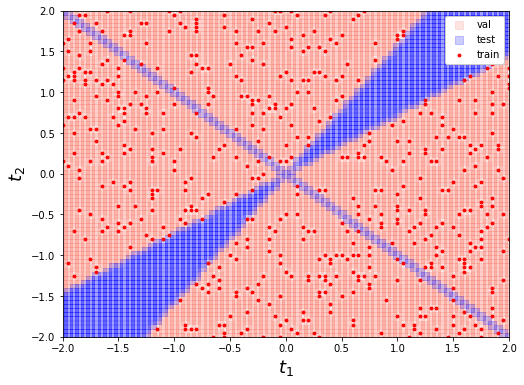

In [14]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [15]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing Experiment class

In [16]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_70"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [17]:
experiment.print_train_val_test()

% train:  0.08306660570035056
% val:  0.747599451303155
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  545
number of val hamiltonians:  4905
number of test hamiltonians:  1111
total number of hamiltonians:  6561


#### Viewing dataset summary

In [18]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.514495
1    0.485505
Name: phase, dtype: float64


total train/val phases: 
0    2804
1    2646
Name: phase, dtype: int64


Summary of test data

% test phases: 
1    0.583158
0    0.416842
Name: phase, dtype: float64


total test phases: 
1    554
0    396
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
1    0.5
0    0.5
Name: phase, dtype: float64


total phases: 
1    3200
0    3200
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [19]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,1,test
1,0,999,0,test
2,0,999,1,test
3,0,999,0,test
4,0,999,1,test


#### Viewing Hamiltonian summary

In [20]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.542857,0.457143,999,0
1,-2.0,-1.95,test,0.650000,0.350000,0,0
2,-2.0,-1.90,test,0.707143,0.292857,0,0
3,-2.0,-1.85,test,0.850000,0.150000,0,0
4,-2.0,-1.80,test,0.842857,0.157143,0,0


#### Viewing accuracy

In [21]:
experiment.accuracy

{'eigenvector_train': 0.9867365661861075,
 'eigenvector_val': 0.9681724188146207,
 'eigenvector_test': 0.8289172932330827,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9989473684210526}

#### Visualizing train/val/test splits with scatter plot

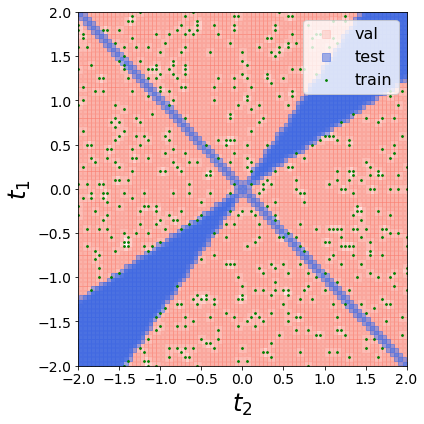

In [22]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_70_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

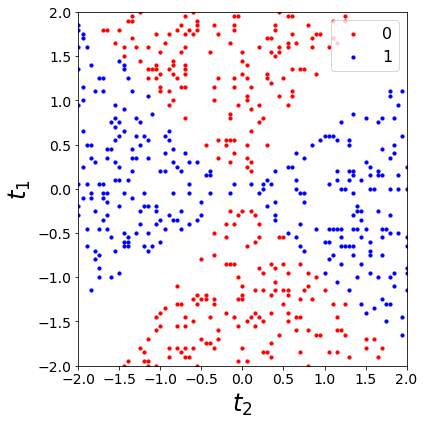

In [23]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                  }
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_70_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

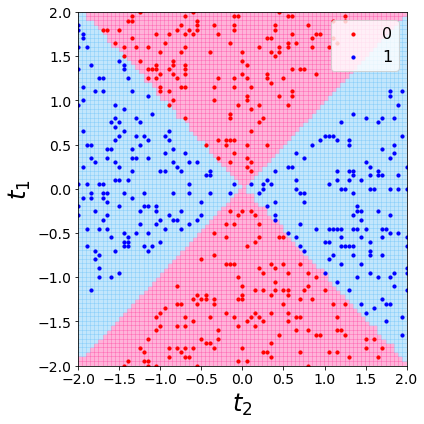

In [24]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}}

#pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_70_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding Heatmaps

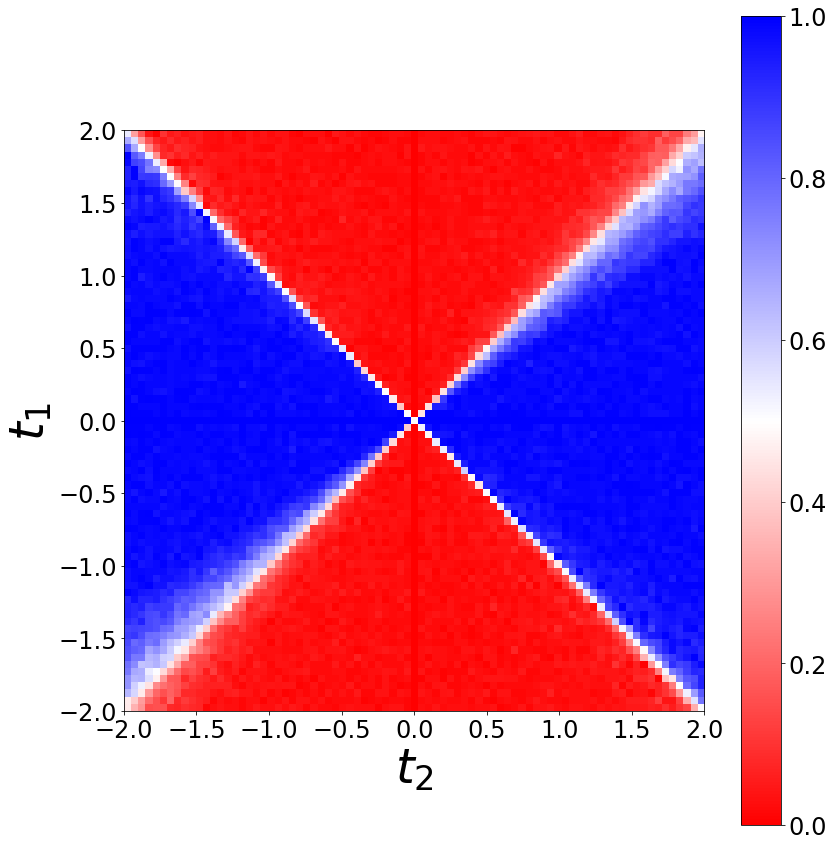

In [25]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = False
savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [26]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_70"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [27]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 133531.45it/s]


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


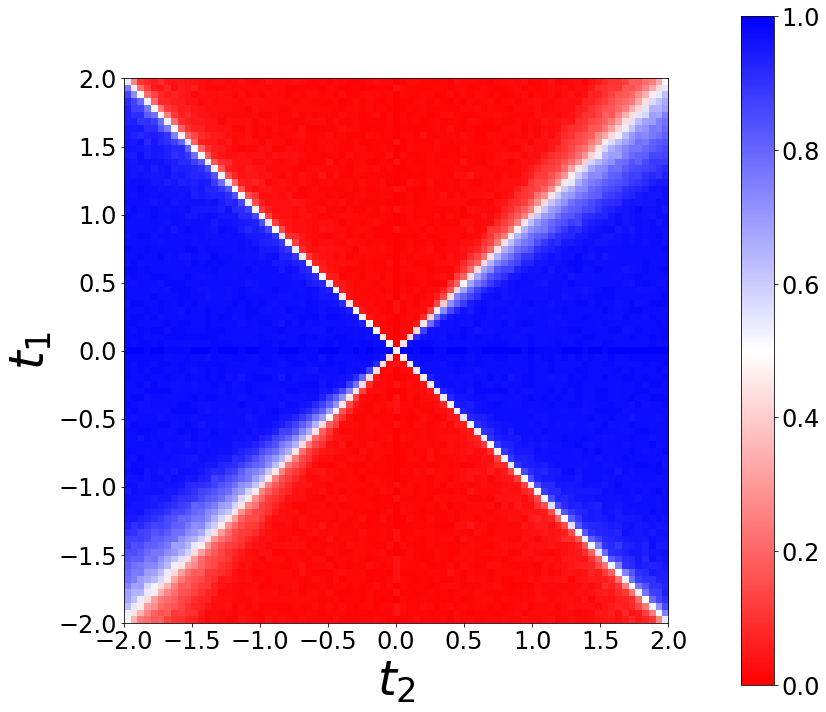

In [28]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_70_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [29]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:22<00:00,  4.33it/s]


{'eigenvector_train': 0.9868623853211008,
 'eigenvector_val': 0.9680623561963011,
 'eigenvector_test': 0.8144555639097745,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9999816513761468,
 'hamiltonian_test': 0.9925684210526318}

#### Computing bootstrap accuracies

In [30]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0, 'hamiltonian_val': 1.0, 'hamiltonian_test': 1.0}

#### Computing mean feature importances

In [31]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 1749.31it/s]

Sorted feature importances:  [(0, 0.16398248393129136), (3, 0.12830513461809778), (1, 0.12651899520052853), (70, 0.11503760781171506), (71, 0.08975321911523113), (73, 0.06431071826727776), (139, 0.02285007099165726), (69, 0.01430904150484379), (5, 0.013785758050583484), (135, 0.008392005712542996), (75, 0.008182933456388682), (72, 0.007990001864738746), (2, 0.007937620281176635), (138, 0.007426051072846317), (68, 0.007110992515202712), (95, 0.006851301144498539), (7, 0.005768261074161849), (77, 0.0040310864725773025), (119, 0.004021631735809819), (65, 0.00401105714840715), (11, 0.0038974563375685765), (137, 0.0038599773885333727), (49, 0.003817516343485198), (25, 0.0037155130668232853), (131, 0.0034593787722592266), (4, 0.003379926705237428), (107, 0.0031837621720476146), (74, 0.0031494598716777255), (9, 0.0030277212254725735), (13, 0.0029862105762528297), (79, 0.0029650305024654412), (83, 0.0029039923604386743), (37, 0.002764123259930963), (31, 0.0027586223079978274), (136, 0.00261935

#### Plotting feature importances

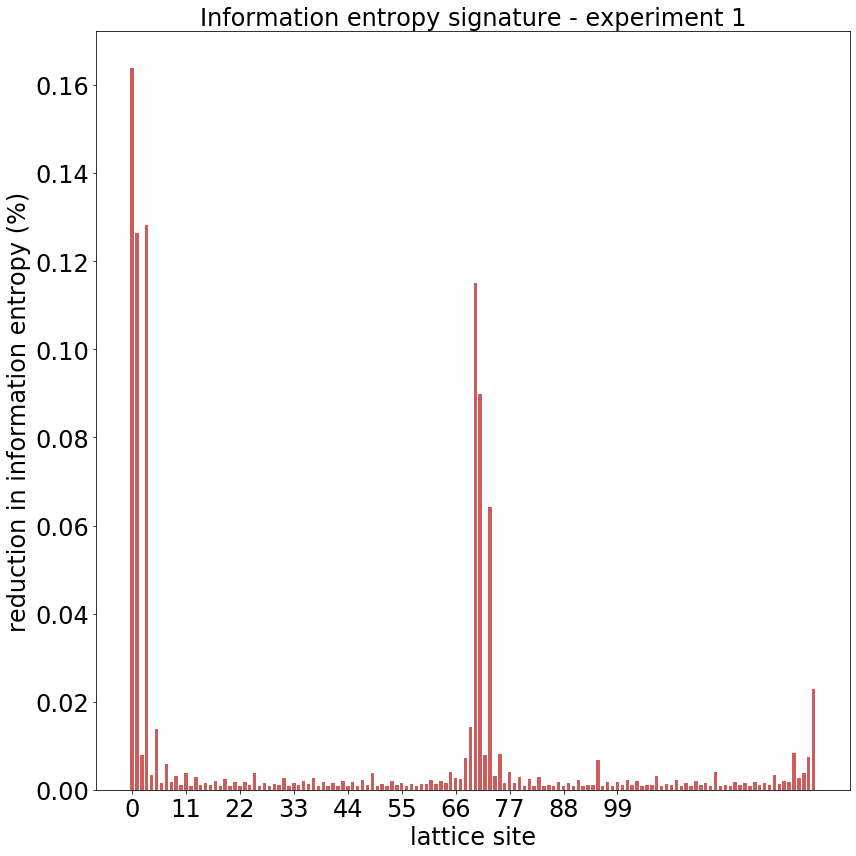

In [32]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "indianred", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_70_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

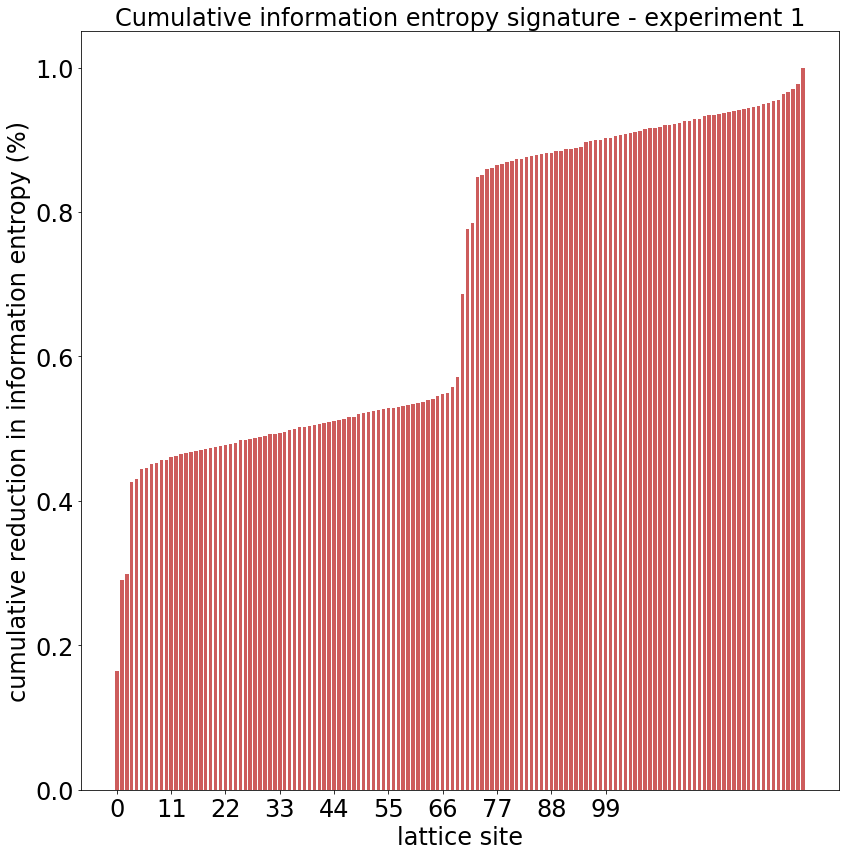

In [33]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"indianred", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_70_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


# Running simulation with most relevant features 0,3

We now rerun the simulations using the most relevant features only

In [34]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 350 µs, sys: 0 ns, total: 350 µs
Wall time: 265 µs


In [35]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path =  "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_70.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_70_feat_0_3"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [0,3]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918540 entries, 0 to 918539
Columns: 148 entries, id to feat139
dtypes: float64(143), int32(3), object(2)
memory usage: 1.0+ GB
CPU times: user 13.1 s, sys: 780 ms, total: 13.9 s
Wall time: 13.2 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.084515,0.084515,...,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.119523,0.119403,...,0.107686,0.105251,0.111901,0.109905,0.115216,0.113673,0.117602,0.116526,0.119042,0.118441
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.119523,0.119042,...,0.074521,0.065845,0.090009,0.082598,0.102604,0.096696,0.111901,0.107686,0.117602,0.115216
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.084515,0.084515,...,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.002030,-0.007389,...,-0.053680,-0.058417,-0.043892,-0.048835,-0.033750,-0.038860,-0.023336,-0.028571,-0.012734,-0.018053


### Running simulation

In [36]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [05:39<00:00,  3.40s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.084515,0.084515,...,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.119523,0.119403,...,0.107686,0.105251,0.111901,0.109905,0.115216,0.113673,0.117602,0.116526,0.119042,0.118441
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.119523,0.119042,...,0.074521,0.065845,0.090009,0.082598,0.102604,0.096696,0.111901,0.107686,0.117602,0.115216
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.084515,0.084515,...,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.002030,-0.007389,...,-0.053680,-0.058417,-0.043892,-0.048835,-0.033750,-0.038860,-0.023336,-0.028571,-0.012734,-0.018053
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.003825,-0.014518,...,-0.095784,-0.101807,-0.081479,-0.088989,-0.064555,-0.073312,-0.045557,-0.055278,-0.025094,-0.035468
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.119522,-0.118510,...,-0.027102,-0.011230,-0.057094,-0.042483,-0.082972,-0.070673,-0.102869,-0.093769,-0.115352,-0.110107
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.001198,-0.014856,...,-0.116254,-0.118928,-0.104678,-0.111475,-0.085558,-0.095987,-0.060272,-0.073581,-0.030641,-0.045872
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.119493,0.118049,...,-0.023989,-0.044511,0.018684,-0.002696,0.058973,0.039463,0.091742,0.076589,0.112811,0.103947
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.002976,-0.024263,...,-0.115828,-0.108701,-0.118804,-0.119232,-0.106629,-0.114557,-0.080856,-0.095273,-0.044771,-0.063839


#### Loading simulation

In [37]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_70_feat_0_3"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [38]:
simulation.n_experiments

100

In [39]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 123744.64it/s]


#### Computing mean accuracies with less features

In [40]:
simulation.n_experiments

100

In [41]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:23<00:00,  4.38it/s]


{'eigenvector_train': 0.9669449541284402,
 'eigenvector_val': 0.6999693461482452,
 'eigenvector_test': 0.5875736842105264,
 'hamiltonian_train': 0.9888807339449543,
 'hamiltonian_val': 0.9261447502548421,
 'hamiltonian_test': 0.6852421052631579}

#### Plotting heatmap for less features

Skipping winding 0
Plotting winding 1


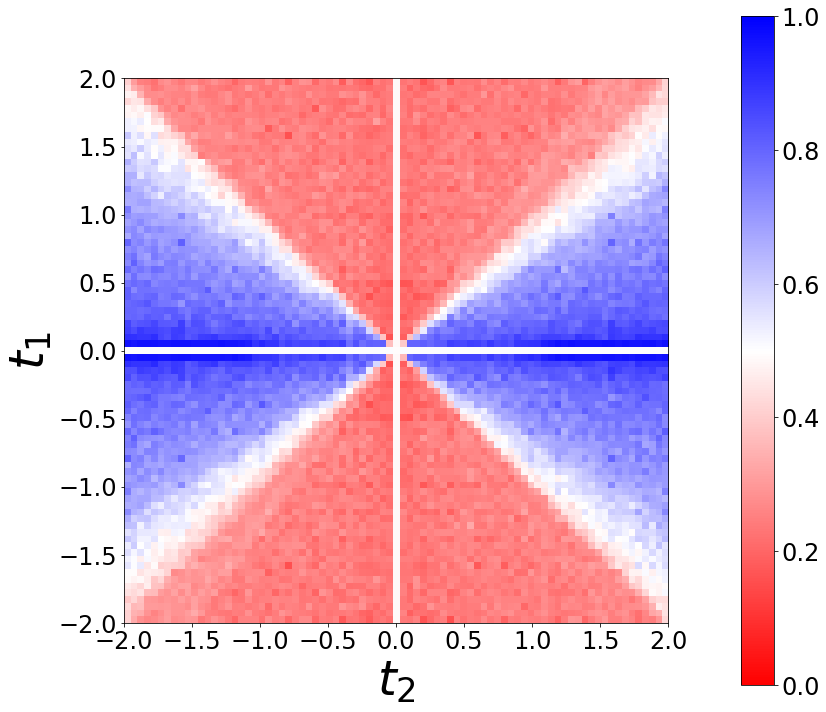

In [42]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_70_feat_0_3_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with most relevant features 0,70

In [43]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path =  "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_70.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_70_feat_0_70"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [0,70]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918540 entries, 0 to 918539
Columns: 148 entries, id to feat139
dtypes: float64(143), int32(3), object(2)
memory usage: 1.0+ GB
CPU times: user 12.8 s, sys: 640 ms, total: 13.4 s
Wall time: 12.7 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.084515,0.084515,...,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.119523,0.119403,...,0.107686,0.105251,0.111901,0.109905,0.115216,0.113673,0.117602,0.116526,0.119042,0.118441
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.119523,0.119042,...,0.074521,0.065845,0.090009,0.082598,0.102604,0.096696,0.111901,0.107686,0.117602,0.115216
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.084515,0.084515,...,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.002030,-0.007389,...,-0.053680,-0.058417,-0.043892,-0.048835,-0.033750,-0.038860,-0.023336,-0.028571,-0.012734,-0.018053


In [44]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [05:32<00:00,  3.27s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.084515,0.084515,...,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.119523,0.119403,...,0.107686,0.105251,0.111901,0.109905,0.115216,0.113673,0.117602,0.116526,0.119042,0.118441
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.119523,0.119042,...,0.074521,0.065845,0.090009,0.082598,0.102604,0.096696,0.111901,0.107686,0.117602,0.115216
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.084515,0.084515,...,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.002030,-0.007389,...,-0.053680,-0.058417,-0.043892,-0.048835,-0.033750,-0.038860,-0.023336,-0.028571,-0.012734,-0.018053
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.003825,-0.014518,...,-0.095784,-0.101807,-0.081479,-0.088989,-0.064555,-0.073312,-0.045557,-0.055278,-0.025094,-0.035468
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.119522,-0.118510,...,-0.027102,-0.011230,-0.057094,-0.042483,-0.082972,-0.070673,-0.102869,-0.093769,-0.115352,-0.110107
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.001198,-0.014856,...,-0.116254,-0.118928,-0.104678,-0.111475,-0.085558,-0.095987,-0.060272,-0.073581,-0.030641,-0.045872
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.119493,0.118049,...,-0.023989,-0.044511,0.018684,-0.002696,0.058973,0.039463,0.091742,0.076589,0.112811,0.103947
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.002976,-0.024263,...,-0.115828,-0.108701,-0.118804,-0.119232,-0.106629,-0.114557,-0.080856,-0.095273,-0.044771,-0.063839


#### Loading simulation

In [45]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_70_feat_0_70"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [46]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 120491.04it/s]


#### Computing mean accuracies with less features

In [47]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:24<00:00,  4.25it/s]


{'eigenvector_train': 0.7010235910878114,
 'eigenvector_val': 0.5645711664482306,
 'eigenvector_test': 0.528234812030075,
 'hamiltonian_train': 0.8660183486238533,
 'hamiltonian_val': 0.5785810397553517,
 'hamiltonian_test': 0.5075368421052632}

#### Plotting heatmap for less features 0,70

Skipping winding 0
Plotting winding 1


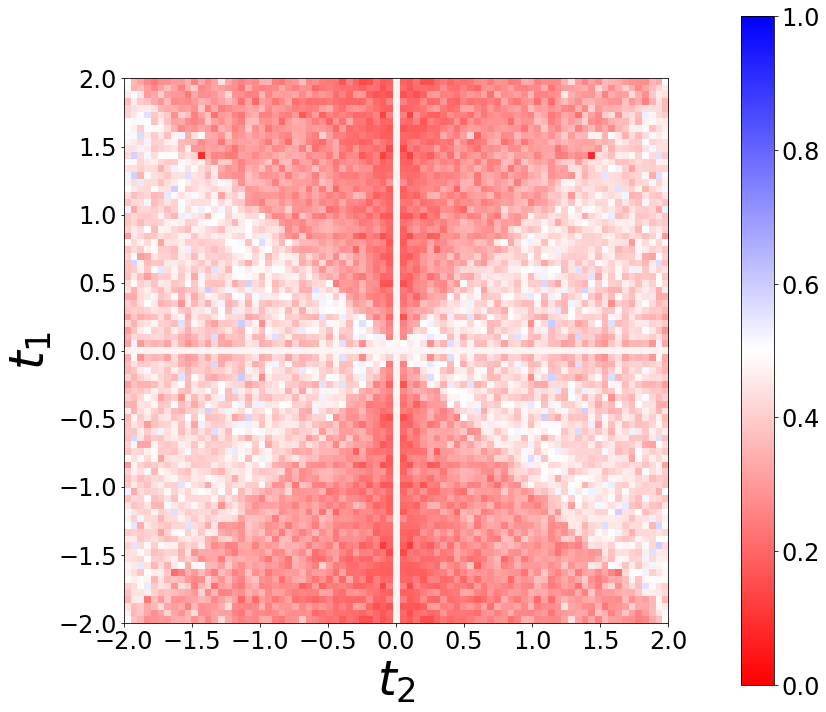

In [48]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_70_feat_0_70_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with random features

In [49]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_70.csv"                   
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_70_random_feat"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918540 entries, 0 to 918539
Columns: 148 entries, id to feat139
dtypes: float64(143), int32(3), object(2)
memory usage: 1.0+ GB
CPU times: user 13.3 s, sys: 776 ms, total: 14.1 s
Wall time: 13.4 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.084515,0.084515,...,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.119523,0.119403,...,0.107686,0.105251,0.111901,0.109905,0.115216,0.113673,0.117602,0.116526,0.119042,0.118441
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.119523,0.119042,...,0.074521,0.065845,0.090009,0.082598,0.102604,0.096696,0.111901,0.107686,0.117602,0.115216
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.084515,0.084515,...,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.002030,-0.007389,...,-0.053680,-0.058417,-0.043892,-0.048835,-0.033750,-0.038860,-0.023336,-0.028571,-0.012734,-0.018053


#### Running simulation

In [50]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = 2
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features, \
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

random_features:  [38 77]


running experiments:   1%|          | 1/100 [00:03<06:01,  3.65s/it]

random_features:  [54 33]


running experiments:   2%|▏         | 2/100 [00:07<05:53,  3.60s/it]

random_features:  [18 75]


running experiments:   3%|▎         | 3/100 [00:10<05:46,  3.57s/it]

random_features:  [83  6]


running experiments:   4%|▍         | 4/100 [00:14<05:39,  3.54s/it]

random_features:  [47 31]


running experiments:   5%|▌         | 5/100 [00:17<05:36,  3.54s/it]

random_features:  [ 19 112]


running experiments:   6%|▌         | 6/100 [00:21<05:32,  3.53s/it]

random_features:  [106   5]


running experiments:   7%|▋         | 7/100 [00:24<05:28,  3.54s/it]

random_features:  [69 19]


running experiments:   8%|▊         | 8/100 [00:28<05:28,  3.58s/it]

random_features:  [45 95]


running experiments:   9%|▉         | 9/100 [00:32<05:28,  3.61s/it]

random_features:  [92 27]


running experiments:  10%|█         | 10/100 [00:35<05:28,  3.65s/it]

random_features:  [60 28]


running experiments:  11%|█         | 11/100 [00:39<05:35,  3.76s/it]

random_features:  [55 77]


running experiments:  12%|█▏        | 12/100 [00:43<05:33,  3.79s/it]

random_features:  [120  77]


running experiments:  13%|█▎        | 13/100 [00:47<05:35,  3.86s/it]

random_features:  [92 87]


running experiments:  14%|█▍        | 14/100 [00:51<05:29,  3.84s/it]

random_features:  [38 67]


running experiments:  15%|█▌        | 15/100 [00:55<05:25,  3.83s/it]

random_features:  [14 28]


running experiments:  16%|█▌        | 16/100 [00:59<05:24,  3.86s/it]

random_features:  [124 107]


running experiments:  17%|█▋        | 17/100 [01:03<05:33,  4.02s/it]

random_features:  [139  75]


running experiments:  18%|█▊        | 18/100 [01:07<05:24,  3.96s/it]

random_features:  [69 12]


running experiments:  19%|█▉        | 19/100 [01:11<05:14,  3.88s/it]

random_features:  [ 32 113]


running experiments:  20%|██        | 20/100 [01:14<05:08,  3.86s/it]

random_features:  [63 54]


running experiments:  21%|██        | 21/100 [01:18<05:03,  3.85s/it]

random_features:  [48 26]


running experiments:  22%|██▏       | 22/100 [01:23<05:14,  4.03s/it]

random_features:  [43 98]


running experiments:  23%|██▎       | 23/100 [01:26<05:01,  3.91s/it]

random_features:  [ 71 112]


running experiments:  24%|██▍       | 24/100 [01:30<04:51,  3.84s/it]

random_features:  [79  1]


running experiments:  25%|██▌       | 25/100 [01:34<04:43,  3.79s/it]

random_features:  [129  40]


running experiments:  26%|██▌       | 26/100 [01:38<04:41,  3.81s/it]

random_features:  [23 61]


running experiments:  27%|██▋       | 27/100 [01:41<04:30,  3.70s/it]

random_features:  [124 113]


running experiments:  28%|██▊       | 28/100 [01:44<04:19,  3.61s/it]

random_features:  [45 42]


running experiments:  29%|██▉       | 29/100 [01:48<04:13,  3.58s/it]

random_features:  [  8 113]


running experiments:  30%|███       | 30/100 [01:51<04:06,  3.52s/it]

random_features:  [35 83]


running experiments:  31%|███       | 31/100 [01:55<04:02,  3.52s/it]

random_features:  [65 92]


running experiments:  32%|███▏      | 32/100 [01:58<04:00,  3.54s/it]

random_features:  [ 7 49]


running experiments:  33%|███▎      | 33/100 [02:02<04:00,  3.59s/it]

random_features:  [137  22]


running experiments:  34%|███▍      | 34/100 [02:05<03:52,  3.53s/it]

random_features:  [97 78]


running experiments:  35%|███▌      | 35/100 [02:09<03:47,  3.50s/it]

random_features:  [131 105]


running experiments:  36%|███▌      | 36/100 [02:13<03:45,  3.53s/it]

random_features:  [132  67]


running experiments:  37%|███▋      | 37/100 [02:16<03:44,  3.56s/it]

random_features:  [ 41 139]


running experiments:  38%|███▊      | 38/100 [02:20<03:45,  3.64s/it]

random_features:  [ 7 90]


running experiments:  39%|███▉      | 39/100 [02:24<03:43,  3.66s/it]

random_features:  [40 73]


running experiments:  40%|████      | 40/100 [02:27<03:35,  3.59s/it]

random_features:  [48 34]


running experiments:  41%|████      | 41/100 [02:31<03:41,  3.76s/it]

random_features:  [116  35]


running experiments:  42%|████▏     | 42/100 [02:35<03:33,  3.68s/it]

random_features:  [128  11]


running experiments:  43%|████▎     | 43/100 [02:38<03:27,  3.63s/it]

random_features:  [10 78]


running experiments:  44%|████▍     | 44/100 [02:42<03:23,  3.64s/it]

random_features:  [  1 115]


running experiments:  45%|████▌     | 45/100 [02:45<03:16,  3.57s/it]

random_features:  [ 12 104]


running experiments:  46%|████▌     | 46/100 [02:50<03:30,  3.90s/it]

random_features:  [ 92 111]


running experiments:  47%|████▋     | 47/100 [02:53<03:18,  3.75s/it]

random_features:  [100 118]


running experiments:  48%|████▊     | 48/100 [02:57<03:12,  3.70s/it]

random_features:  [44 73]


running experiments:  49%|████▉     | 49/100 [03:00<03:03,  3.60s/it]

random_features:  [120  49]


running experiments:  50%|█████     | 50/100 [03:04<02:58,  3.57s/it]

random_features:  [103  47]


running experiments:  51%|█████     | 51/100 [03:08<02:56,  3.60s/it]

random_features:  [ 26 114]


running experiments:  52%|█████▏    | 52/100 [03:12<03:02,  3.81s/it]

random_features:  [91 21]


running experiments:  53%|█████▎    | 53/100 [03:16<02:58,  3.80s/it]

random_features:  [ 4 78]


running experiments:  54%|█████▍    | 54/100 [03:20<03:03,  3.99s/it]

random_features:  [43 74]


running experiments:  55%|█████▌    | 55/100 [03:24<02:55,  3.91s/it]

random_features:  [19 29]


running experiments:  56%|█████▌    | 56/100 [03:28<02:51,  3.90s/it]

random_features:  [104 108]


running experiments:  57%|█████▋    | 57/100 [03:32<02:53,  4.04s/it]

random_features:  [77 16]


running experiments:  58%|█████▊    | 58/100 [03:36<02:43,  3.89s/it]

random_features:  [24 73]


running experiments:  59%|█████▉    | 59/100 [03:39<02:36,  3.81s/it]

random_features:  [ 83 134]


running experiments:  60%|██████    | 60/100 [03:43<02:31,  3.78s/it]

random_features:  [121 134]


running experiments:  61%|██████    | 61/100 [03:47<02:27,  3.77s/it]

random_features:  [86 79]


running experiments:  62%|██████▏   | 62/100 [03:50<02:24,  3.79s/it]

random_features:  [ 11 114]


running experiments:  63%|██████▎   | 63/100 [03:54<02:20,  3.79s/it]

random_features:  [129  40]


running experiments:  64%|██████▍   | 64/100 [03:58<02:17,  3.83s/it]

random_features:  [ 0 33]


running experiments:  65%|██████▌   | 65/100 [04:02<02:11,  3.76s/it]

random_features:  [ 65 120]


running experiments:  66%|██████▌   | 66/100 [04:05<02:07,  3.74s/it]

random_features:  [101   5]


running experiments:  67%|██████▋   | 67/100 [04:09<02:02,  3.70s/it]

random_features:  [19 75]


running experiments:  68%|██████▊   | 68/100 [04:13<01:58,  3.71s/it]

random_features:  [44 79]


running experiments:  69%|██████▉   | 69/100 [04:16<01:52,  3.63s/it]

random_features:  [51 20]


running experiments:  70%|███████   | 70/100 [04:20<01:47,  3.59s/it]

random_features:  [71 17]


running experiments:  71%|███████   | 71/100 [04:23<01:43,  3.56s/it]

random_features:  [61 32]


running experiments:  72%|███████▏  | 72/100 [04:27<01:38,  3.52s/it]

random_features:  [  8 115]


running experiments:  73%|███████▎  | 73/100 [04:30<01:34,  3.50s/it]

random_features:  [102  55]


running experiments:  74%|███████▍  | 74/100 [04:34<01:30,  3.47s/it]

random_features:  [117 119]


running experiments:  75%|███████▌  | 75/100 [04:37<01:26,  3.48s/it]

random_features:  [126 128]


running experiments:  76%|███████▌  | 76/100 [04:41<01:24,  3.52s/it]

random_features:  [ 58 138]


running experiments:  77%|███████▋  | 77/100 [04:45<01:24,  3.67s/it]

random_features:  [137 107]


running experiments:  78%|███████▊  | 78/100 [04:48<01:21,  3.68s/it]

random_features:  [15 87]


running experiments:  79%|███████▉  | 79/100 [04:52<01:15,  3.61s/it]

random_features:  [ 96 104]


running experiments:  80%|████████  | 80/100 [04:56<01:14,  3.75s/it]

random_features:  [ 75 113]


running experiments:  81%|████████  | 81/100 [04:59<01:09,  3.66s/it]

random_features:  [ 38 112]


running experiments:  82%|████████▏ | 82/100 [05:03<01:05,  3.64s/it]

random_features:  [ 32 121]


running experiments:  83%|████████▎ | 83/100 [05:06<01:00,  3.57s/it]

random_features:  [128 130]


running experiments:  84%|████████▍ | 84/100 [05:10<00:57,  3.57s/it]

random_features:  [138  20]


running experiments:  85%|████████▌ | 85/100 [05:14<00:53,  3.59s/it]

random_features:  [88 39]


running experiments:  86%|████████▌ | 86/100 [05:17<00:49,  3.55s/it]

random_features:  [37 77]


running experiments:  87%|████████▋ | 87/100 [05:21<00:46,  3.61s/it]

random_features:  [26 64]


running experiments:  88%|████████▊ | 88/100 [05:25<00:44,  3.73s/it]

random_features:  [109  82]


running experiments:  89%|████████▉ | 89/100 [05:28<00:39,  3.63s/it]

random_features:  [105  73]


running experiments:  90%|█████████ | 90/100 [05:32<00:35,  3.57s/it]

random_features:  [ 6 82]


running experiments:  91%|█████████ | 91/100 [05:36<00:33,  3.73s/it]

random_features:  [ 56 102]


running experiments:  92%|█████████▏| 92/100 [05:39<00:29,  3.69s/it]

random_features:  [133  74]


running experiments:  93%|█████████▎| 93/100 [05:43<00:25,  3.63s/it]

random_features:  [102  49]


running experiments:  94%|█████████▍| 94/100 [05:46<00:21,  3.57s/it]

random_features:  [133 122]


running experiments:  95%|█████████▌| 95/100 [05:50<00:17,  3.54s/it]

random_features:  [52 70]


running experiments:  96%|█████████▌| 96/100 [05:53<00:14,  3.54s/it]

random_features:  [23 59]


running experiments:  97%|█████████▋| 97/100 [05:57<00:10,  3.52s/it]

random_features:  [ 5 99]


running experiments:  98%|█████████▊| 98/100 [06:00<00:07,  3.54s/it]

random_features:  [32 82]


running experiments:  99%|█████████▉| 99/100 [06:04<00:03,  3.68s/it]

random_features:  [57 67]


running experiments: 100%|██████████| 100/100 [06:08<00:00,  3.72s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat130,feat131,feat132,feat133,feat134,feat135,feat136,feat137,feat138,feat139
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.084515,0.084515,...,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515,0.084515
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.119523,0.119403,...,0.107686,0.105251,0.111901,0.109905,0.115216,0.113673,0.117602,0.116526,0.119042,0.118441
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.119523,0.119042,...,0.074521,0.065845,0.090009,0.082598,0.102604,0.096696,0.111901,0.107686,0.117602,0.115216
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.084515,0.084515,...,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515,-0.084515,0.084515
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.002030,-0.007389,...,-0.053680,-0.058417,-0.043892,-0.048835,-0.033750,-0.038860,-0.023336,-0.028571,-0.012734,-0.018053
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.003825,-0.014518,...,-0.095784,-0.101807,-0.081479,-0.088989,-0.064555,-0.073312,-0.045557,-0.055278,-0.025094,-0.035468
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.119522,-0.118510,...,-0.027102,-0.011230,-0.057094,-0.042483,-0.082972,-0.070673,-0.102869,-0.093769,-0.115352,-0.110107
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.001198,-0.014856,...,-0.116254,-0.118928,-0.104678,-0.111475,-0.085558,-0.095987,-0.060272,-0.073581,-0.030641,-0.045872
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.119493,0.118049,...,-0.023989,-0.044511,0.018684,-0.002696,0.058973,0.039463,0.091742,0.076589,0.112811,0.103947
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.002976,-0.024263,...,-0.115828,-0.108701,-0.118804,-0.119232,-0.106629,-0.114557,-0.080856,-0.095273,-0.044771,-0.063839


#### Loading simulation with random features

In [51]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_70_random_feat"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary for simulation with random features

In [52]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 120656.93it/s]


#### Computing mean accuracies for simulation with random features

In [53]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:23<00:00,  4.27it/s]


{'eigenvector_train': 0.956208125819135,
 'eigenvector_val': 0.6632455220620358,
 'eigenvector_test': 0.5673027067669173,
 'hamiltonian_train': 0.9874311926605506,
 'hamiltonian_val': 0.8800693170234455,
 'hamiltonian_test': 0.7115578947368421}

#### Plotting heatmap for simulation with random features

Skipping winding 0
Plotting winding 1


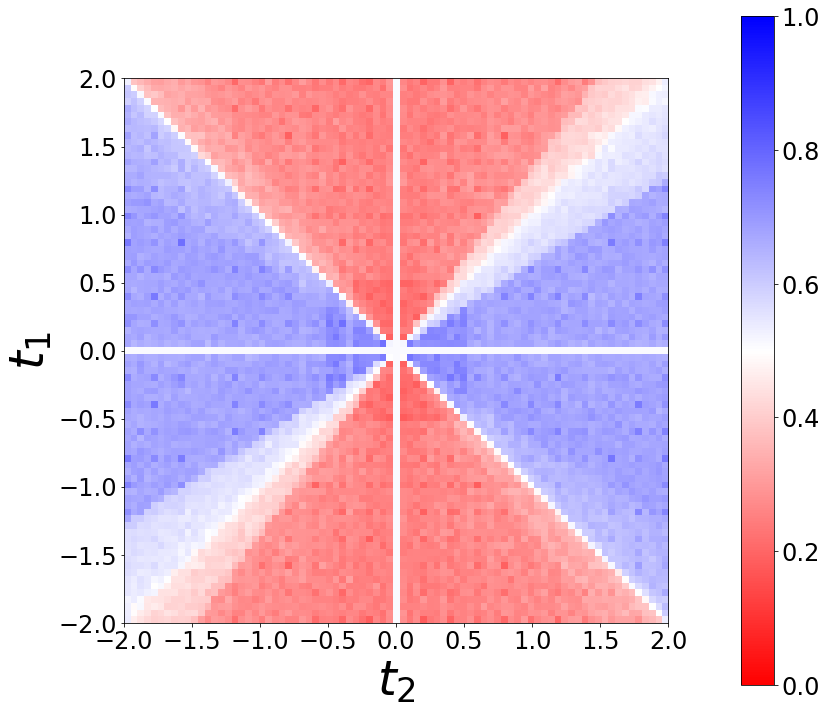

In [54]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_70_random_feat_2_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)